**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

**Loading our dataset from pc**

In [3]:
data = pd.read_csv('dataset/train-data.csv', encoding = 'utf-8')

**The first five rows of our dataset**

In [4]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,status,...,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0,CA,37.392480,-122.072612,94041,c:1001,Mountain View,NaN,FriendFeed,acquired,...,0,c:1001,0,0,1,0,0,0,3.0,1
1,1,MA,42.368633,-71.075305,2210,c:10054,Boston,NaN,Jumptap,acquired,...,0,c:10054,1,0,1,1,1,1,4.5,1
2,2,NY,40.745064,-73.992637,10001,c:101312,New York,NaN,SideTour,acquired,...,0,c:101312,0,1,1,0,0,0,2.0,1
3,3,NY,40.775309,-73.983656,10001,c:10137,New York,NaN,Producteev,acquired,...,0,c:10137,0,1,0,0,0,0,6.0,1
4,4,MO,38.703764,-90.443832,63043,c:10153,Saint Louis,NaN,"ITOG, Inc.",closed,...,1,c:10153,0,1,0,0,0,0,1.0,0


 **The last five rows of our dataset**

In [5]:
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,status,...,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
1149,1149,CA,37.758062,-122.418642,94110,c:9772,San Francisco,NaN,Fluther,acquired,...,0,c:9772,0,1,0,0,0,0,7.0,1
1150,1150,CA,41.789420,-87.596232,94105,c:9782,San Francisco,NaN,ReTel Technologies,acquired,...,1,c:9782,0,1,0,0,0,0,4.5,1
1151,1151,NY,40.740441,-73.993376,10011,c:9816,New York,NaN,ShopWiki,acquired,...,0,c:9816,0,0,1,0,0,0,1.0,0
1152,1152,NY,40.739010,-73.997259,10011,c:9822,New York,New York NY 10011,DailyBurn,acquired,...,0,c:9822,0,1,0,0,0,0,2.5,1
1153,1153,CA,37.557637,-122.285714,94304,c:997,Palo Alto,NaN,Zimbra,acquired,...,0,c:997,0,0,0,0,1,0,9.0,1


**The shape/ number of rows and columns in our dataset**

In [6]:
data.shape

(1154, 49)

 **Describing the dataset**

In [7]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,959.000000,959.000000,1154.000000,1154.000000,...,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,576.500000,38.498031,-104.400330,0.646447,2.214410,3.892010,3.085020,4.756209,7.546794,2.312825,...,0.003466,0.314558,0.310225,0.253033,0.506932,0.402946,0.238302,0.100520,2.864716,0.806759
std,333.275412,3.730141,22.010256,0.478280,2.536424,2.988752,2.965513,3.205125,7.011573,1.380093,...,0.058798,0.464541,0.462786,0.434938,0.500169,0.490703,0.426229,0.300822,1.932240,0.395011
min,0.000000,25.752358,-122.989827,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,288.250000,37.388869,-122.227897,0.000000,0.493875,1.669175,1.000000,2.400000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,576.500000,37.779281,-118.487549,1.000000,1.443850,3.506850,2.504100,4.465800,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,864.750000,40.730646,-78.520960,1.000000,3.500700,5.528725,4.675350,6.758900,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.729175,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000


**Showing the features/ columns of our dataset**

In [8]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'status', 'labels', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500'],
      dtype='object')

**The number of unique values of each features/ columns**

In [9]:
data.nunique()

Unnamed: 0                  1154
state_code                    37
latitude                     789
longitude                    788
zip_code                     431
id                          1152
city                         250
Unnamed: 6                   286
name                        1152
status                         2
labels                         2
founded_at                   250
closed_at                    250
first_funding_at             686
last_funding_at              803
age_first_funding_year       748
age_last_funding_year        925
age_first_milestone_year     547
age_last_milestone_year      707
relationships                 42
funding_rounds                 9
funding_total_usd            603
milestones                     8
state_code.1                  37
is_CA                          2
is_NY                          2
is_MA                          2
is_TX                          2
is_otherstate                  2
category_code                 35
is_softwar

**The summation of all the null values in each features/ columns**

In [10]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  618
name                          0
status                        0
labels                        0
founded_at                    0
closed_at                   735
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    195
age_last_milestone_year     195
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web  

**The datatypes of each of the features/ columns**

In [11]:
data.dtypes

Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
status                       object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                       

**Dropping the irrelevant/ unwanted features/ columns from our dataset**

In [12]:
data.drop(['Unnamed: 0','state_code','latitude','longitude','zip_code','id','city','Unnamed: 6','name','labels','founded_at','closed_at','first_funding_at','last_funding_at','funding_total_usd','state_code.1','category_code','object_id','has_roundA','has_roundB','has_roundC','has_roundD'], axis=1,inplace=True)

**The size of our dataset after dropping the columns**

In [13]:
data.shape

(1154, 27)

**Checking if there are any features/ columns with null values in our dataset**

In [14]:
data.isnull().sum()

status                        0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    195
age_last_milestone_year     195
relationships                 0
funding_rounds                0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
avg_participants              0
is_top500                     0
dtype: int64

**Dropping the feature/ columns with null values from our dataset**

In [15]:
data.drop(['age_first_milestone_year','age_last_milestone_year'], axis=1, inplace=True)

**Checking if there are any more null values after the drops**

In [16]:
data.isnull().sum()

status                    0
age_first_funding_year    0
age_last_funding_year     0
relationships             0
funding_rounds            0
milestones                0
is_CA                     0
is_NY                     0
is_MA                     0
is_TX                     0
is_otherstate             0
is_software               0
is_web                    0
is_mobile                 0
is_enterprise             0
is_advertising            0
is_gamesvideo             0
is_ecommerce              0
is_biotech                0
is_consulting             0
is_othercategory          0
has_VC                    0
has_angel                 0
avg_participants          0
is_top500                 0
dtype: int64

### **There is a feature/ column in our dataset that is labeled by 'status', it is a categorical feature with 2 unique values in total. We will add 2 new columns with these 2 unique values of 'acquired' and 'closed' by creating dummies and concatenate with our own dataset**

In [17]:
dummy = pd.get_dummies(data['status'])
data=pd.concat((data,dummy), axis=1)

**After creating 2 extra columns for the 2 unique values of the feature- status, we will drop the feature/ column of -status**

In [18]:
data.drop(['status'],axis=1,inplace=True)

**Dataset after dropping the -status feature/ column with 10 rows**

In [19]:
data.head(10)

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,...,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,avg_participants,is_top500,acquired,closed
0,0.4055,0.4055,14,1,3,1,0,0,0,0,...,0,0,0,0,0,0,3.0,1,1,0
1,0.1616,7.5041,45,7,3,0,0,1,0,0,...,0,0,0,0,1,0,4.5,1,1,0
2,0.0822,1.8164,7,3,2,0,1,0,0,0,...,0,0,0,0,0,1,2.0,1,1,0
3,0.0192,1.5699,12,3,2,0,1,0,0,0,...,0,0,0,0,0,1,6.0,1,1,0
4,1.3973,1.3973,1,1,0,0,0,0,0,1,...,0,0,0,1,0,1,1.0,0,0,1
5,0.4521,6.0822,2,3,1,0,0,0,0,1,...,0,0,0,1,0,0,1.0,0,1,0
6,0.3589,3.4712,38,5,3,1,0,0,0,0,...,0,0,0,0,0,0,5.2,1,1,0
7,1.1370,3.7370,14,3,3,1,0,0,0,0,...,0,0,0,0,0,0,3.0,1,1,0
8,1.9342,4.0438,2,2,3,1,0,0,0,0,...,0,0,0,0,0,0,2.5,1,1,0
9,0.7699,2.8548,3,2,2,0,0,0,0,1,...,0,0,0,1,1,1,1.0,1,1,0


**As we can see, all the values in our dataset are now in numeric values. We will now scale all the values down to 0-1. All the values of each of the features/ columns will now be in the range of 0 and 1**

In [20]:
scaler = preprocessing.MinMaxScaler()
names = data.columns
data_scale = scaler.fit_transform(data)
data = pd.DataFrame(data_scale, columns=names)

**Dataset after Normalization**

In [21]:
data.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,...,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,avg_participants,is_top500,acquired,closed
0,0.305473,0.305473,0.222222,0.000000,0.375,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,1.0,1.0,0.0
1,0.297591,0.534886,0.714286,0.666667,0.375,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.184211,1.0,1.0,0.0
2,0.295025,0.351071,0.111111,0.222222,0.250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.052632,1.0,1.0,0.0
3,0.292989,0.343104,0.190476,0.222222,0.250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.263158,1.0,1.0,0.0
4,0.337526,0.337526,0.015873,0.000000,0.000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.0


In [22]:
data["acquired"].value_counts()

1.0    746
0.0    408
Name: acquired, dtype: int64

**Creating a pie chart for showing the difference between the acquired/ success and closed startups**

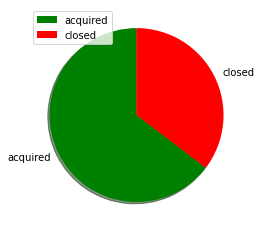

In [23]:
activities = ['acquired', 'closed']
slices = [746, 408]
color = ['green', 'red']
plt.pie(slices, labels=activities, colors=color, shadow=True, startangle=90)
plt.legend()
plt.show()

In [24]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [25]:
data.columns

Index(['age_first_funding_year', 'age_last_funding_year', 'relationships',
       'funding_rounds', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'avg_participants', 'is_top500', 'acquired', 'closed'],
      dtype='object')

In [26]:
data.drop(['closed'], axis=1,inplace=True)

In [27]:
col_names = ['age_first_funding_year', 'age_last_funding_year', 'relationships',
       'funding_rounds', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'avg_participants', 'is_top500', 'acquired']

In [28]:
data.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,...,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,avg_participants,is_top500,acquired
0,0.305473,0.305473,0.222222,0.000000,0.375,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,1.0,1.0
1,0.297591,0.534886,0.714286,0.666667,0.375,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.184211,1.0,1.0
2,0.295025,0.351071,0.111111,0.222222,0.250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.052632,1.0,1.0
3,0.292989,0.343104,0.190476,0.222222,0.250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.263158,1.0,1.0
4,0.337526,0.337526,0.015873,0.000000,0.000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0


In [29]:
#split dataset in features and target variable
feature_cols = ['age_first_funding_year', 'age_last_funding_year', 'relationships',
       'funding_rounds', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'avg_participants', 'is_top500']
X = data[feature_cols] # Features
y = data.acquired # Target variable

In [30]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


In [33]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install pydotplus

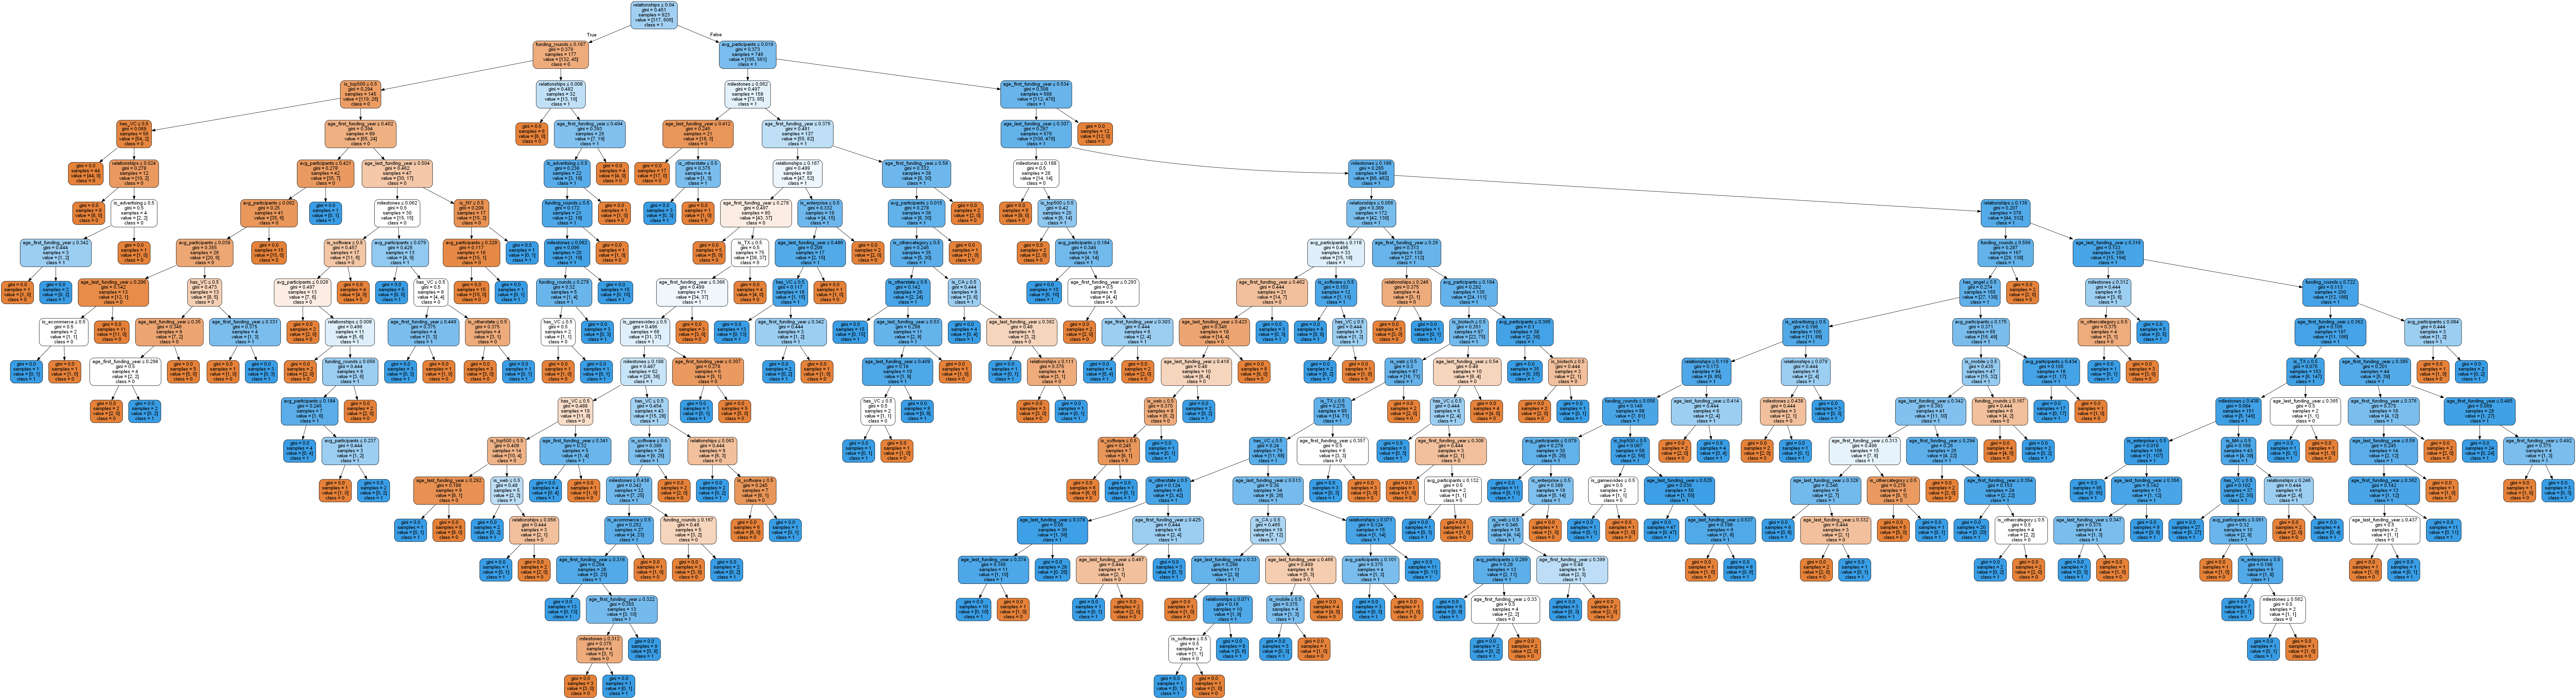

In [35]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dTree.png')
Image(graph.create_png())

In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7619047619047619


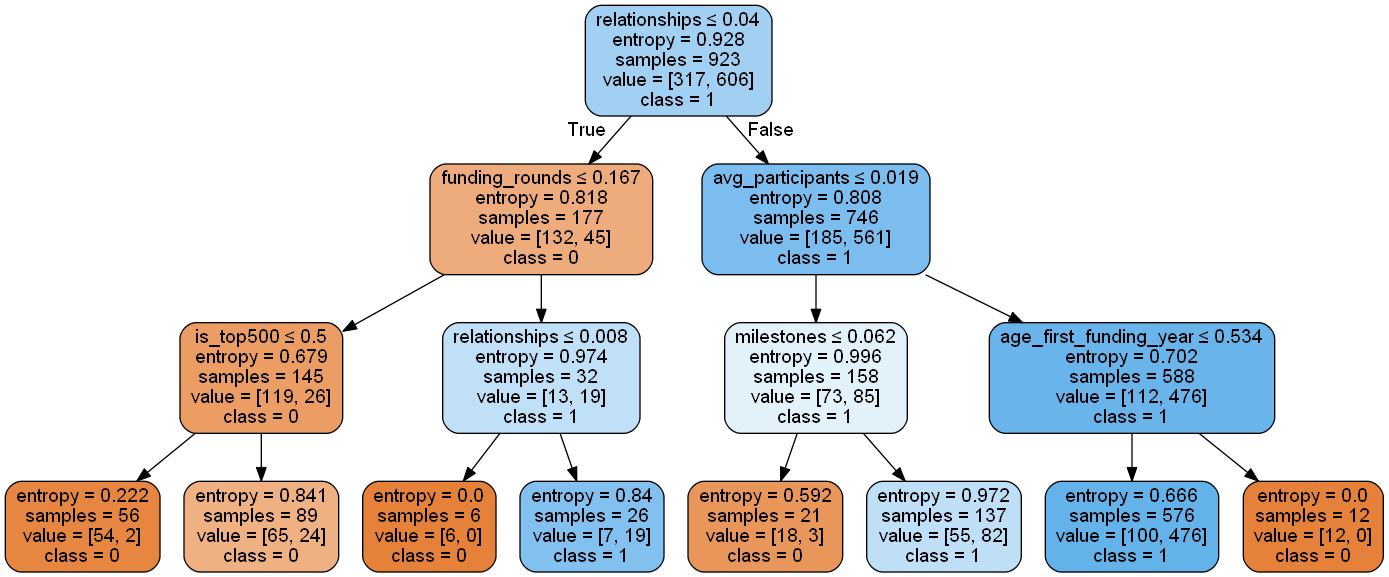

In [37]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DTree.png')
Image(graph.create_png())

In [41]:
from sklearn.tree import export_text
tree_rules = export_text(clf,
                        feature_names = feature_cols)
print(tree_rules)

|--- relationships <= 0.04
|   |--- funding_rounds <= 0.17
|   |   |--- is_top500 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- is_top500 >  0.50
|   |   |   |--- class: 0.0
|   |--- funding_rounds >  0.17
|   |   |--- relationships <= 0.01
|   |   |   |--- class: 0.0
|   |   |--- relationships >  0.01
|   |   |   |--- class: 1.0
|--- relationships >  0.04
|   |--- avg_participants <= 0.02
|   |   |--- milestones <= 0.06
|   |   |   |--- class: 0.0
|   |   |--- milestones >  0.06
|   |   |   |--- class: 1.0
|   |--- avg_participants >  0.02
|   |   |--- age_first_funding_year <= 0.53
|   |   |   |--- class: 1.0
|   |   |--- age_first_funding_year >  0.53
|   |   |   |--- class: 0.0



In [43]:
test_pred_decision_tree = clf.predict(X_test)

In [45]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, 
                                            test_pred_decision_tree)

In [46]:
print(confusion_matrix)

[[ 43  48]
 [  7 133]]


In [57]:
labels = y.unique()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

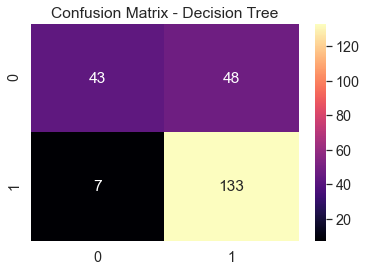

<Figure size 720x504 with 0 Axes>

In [58]:
matrix_df = pd.DataFrame(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xticklabels(['']+labels)
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_yticklabels(list(labels), rotation = 0)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

In [52]:
#Accuracy

In [53]:
metrics.accuracy_score(y_test, test_pred_decision_tree)

0.7619047619047619

In [ ]:
#Precision

In [59]:
precision = metrics.precision_score(y_test, test_pred_decision_tree, 
                                  average=None)
precision_results = pd.DataFrame(precision, index=labels)

#renaming results column
precision_results.rename(columns={0:'Precision'}, inplace =True)

precision_results

,Precision
1.0,0.860000
0.0,0.734807


In [60]:
#Recall

In [62]:
recall = metrics.recall_score(y_test, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)

recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
1.0,0.472527
0.0,0.950000


In [63]:
#f1

In [64]:
f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels)

#rename results column
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
1.0,0.609929
0.0,0.828660


In [67]:
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

         0.0       0.86      0.47      0.61        91
         1.0       0.73      0.95      0.83       140

    accuracy                           0.76       231
   macro avg       0.80      0.71      0.72       231
weighted avg       0.78      0.76      0.74       231



In [66]:
report2 = classification_report(y_test, DecisionTreeClassifier(X_test))
print(report2)

NameError: name 'classification_report' is not defined